# Srujan Jabbireddy - Homework 2

**Due: 11:55pm Wednesday 19th February**

We numerically explore the relationship between error distributions, objective functions (least squares, least absolute deviation, and weighted least squares), and computational speed.

The following simulation creates a data set according to
$$y_i = \beta_1 + \beta_2 x_i + \beta_3 x_i^2 + \epsilon_i.$$

We generate $n$ observations from this model for $x$ on an equally spaced grid $[0,1]$. For $Y^{(t)}$, the errors ($\epsilon_i$) have a t-distribution with 2 degrees of freedom. For $Y^{(n)}$, the errors have a standard normal distribution. For $Y^{(w)}$, the errors are heteroscedastic: $\epsilon_i|\sigma_i^2 \sim N(0,\sigma_i^2)$,  where $\sigma_i \sim 0.1 + \text{Exp}(1)$ (that is, an exponential distribution shifted $0.1$ to the right). We plot each of these data sets and the true regression function.

In [ ]:
set.seed(1234)
n <- 500
x <- seq(from=0,to=1,length.out=n)
X <- cbind(1,x,x^2)
beta <- matrix(c(1,2,4),nrow=3)
Yt <- X%*%beta + rt(n,df=2)
Yn <- X%*%beta + rnorm(n)
sig <- 0.1 + rexp(n) 
Yw <- X%*%beta + rnorm(n,sd=sig)

In [ ]:
options(repr.plot.width=7.5,repr.plot.height=3.5)
par(mar=c(4,4,1,1),mfcol=c(1,2))
ylim <- c(-5,10)
plot(X[,2],Yt,xlab="x",ylab="y",main="t errors",ylim=ylim)
points(X[,2],X%*%beta,type='l',col='red',lwd=2)
plot(X[,2],Yn,xlab="x",ylab="y",main="normal errors",ylim=ylim)
points(X[,2],X%*%beta,type='l',col='red',lwd=2)
plot(X[,2],Yw,xlab="x",ylab="y",main="heteroscedastic errors",ylim=ylim)
points(X[,2],X%*%beta,type='l',col='red',lwd=2)

The t distribution produces a lot of outliers (some outliers are not shown because we restricted the y-axis to ylim in each plot) and there are also a lot of outliers in the case of the heteroscedastic errors. Given the data, out goal is to infer the parameters $\beta$. We will mainly consider two methods. The least squares method we discussed in class is
$$ \beta_{LS} = \text{argmin}_{\beta} \sum_{i=1}^n(y_i - \beta_1 - \beta_2 x_i - \beta_3 x_i^2)^2 =  \text{argmin}_{\beta} (Y - X\beta)^T(Y - X\beta) = (X^TX)^{-1}X^TY$$
A second possibility is to find the [least absolute deviations](https://en.wikipedia.org/wiki/Least_absolute_deviations) estimator. We call this $\beta_{LAD}$ which has the form
$$\beta_{LAD} = \text{argmin}_{\beta}\sum_{i=1}^n |y_i - \beta_1 - \beta_2 x_i - \beta_3 x_i^2|.$$
This may also be known as $L_1$ regression or quantile regression with the $0.5$ quantile.

In this homework you will fit both $\beta_{LS}$ and $\beta_{LAD}$ and compare the methods based on parameter estimation accuracy and speed. In the case of the heteroscedastic errors dataset we will also compare to the weighted least squares estimator $\beta_{WLS}= (X^TWX)^{-1}X^TWY$, where $W$ is a diagonal matrix, with the diagonal given by $1/\sigma_i^2$ for $i=1,\dots,n$ (assume that the $\sigma_i$ are known). 

## Question 1

Fixing $X$, generate the $Y^{(t)}$, $Y^{(n)}$, and $Y^{(w)}$ datasets $N=100$ times (note that $n$ is the sample size and $N$ is the number of times we run the simulation). For the  $Y^{(t)}$ and $Y^{(n)}$ datasets, compute $\beta_{LS}$ and $\beta_{LAD}$ each time. Since $\beta$ is a vector of length $3$, this will result in 4 matrices (LS for $Y^{(t)}$ and $Y^{(n)}$ and LAD for $Y^{(t)}$ and $Y^{(n)}$) with $N$ rows and 3 columns (you could store this output in other formats as well, but matrices are convenient). For the $Y^{(w)}$ datasets, compute all three estimators $\beta_{LS}$, $\beta_{LAD}$, and $\beta_{WLS}$, and similarly store them in matrices. 

Make scatterplots of $\beta_2$ versus $\beta_3$ estimates for each data type and each estimator. This will produce seven scatterplots in total. Mark the true $\beta_2$ and $\beta_3$ on each plot and comment of the quality of the estimators in the different settings. Your scatterplots should look similar to the ones below.

**Tips for Fitting** 

- For fitting $\beta_{LS}$, you have many options in R (lm, lm.fit) and python (scipy.linalg.lstsq, sklearn.linear_model.LinearRegression). 
- For fitting $\beta_{LAD}$ in R you can use l1fit from the package L1pack or  rq.fit from quantreg. For fitting $\beta_{LAD}$ in Python the options are somewhat more limited:
    * [statsmodels](http://www.statsmodels.org/dev/examples/notebooks/generated/quantile_regression.html) requires use of pandas, calls the quantreg R package
    * generic optimizer such as [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)   
  The latter is a more general method that will likely be slower. On the other hand, scipy.optimize will also be useful for many other problems. You may also use any other optimizer you find. 
- For fitting $\beta_{WLS}$ in R you can use for example lm.wfit or lsfit (the latter may be more convenient here). In Python you can use for example the sample_weight option in sklearn.linear_model.LinearRegression or statsmodels.regression.linear_model.WLS. 

The t distribution produces a lot of outliers (some outliers are not shown because we restricted the y-axis to ylim in each plot) and there are also a lot of outliers in the case of the heteroscedastic errors. Given the data, out goal is to infer the parameters $\beta$. We will mainly consider two methods. The least squares method we discussed in class is
$$ \beta_{LS} = \text{argmin}_{\beta} \sum_{i=1}^n(y_i - \beta_1 - \beta_2 x_i - \beta_3 x_i^2)^2 =  \text{argmin}_{\beta} (Y - X\beta)^T(Y - X\beta) = (X^TX)^{-1}X^TY$$
A second possibility is to find the [least absolute deviations](https://en.wikipedia.org/wiki/Least_absolute_deviations) estimator. We call this $\beta_{LAD}$ which has the form
$$\beta_{LAD} = \text{argmin}_{\beta}\sum_{i=1}^n |y_i - \beta_1 - \beta_2 x_i - \beta_3 x_i^2|.$$
This may also be known as $L_1$ regression or quantile regression with the $0.5$ quantile.

In this homework you will fit both $\beta_{LS}$ and $\beta_{LAD}$ and compare the methods based on parameter estimation accuracy and speed. In the case of the heteroscedastic errors dataset we will also compare to the weighted least squares estimator $\beta_{WLS}= (X^TWX)^{-1}X^TWY$, where $W$ is a diagonal matrix, with the diagonal given by $1/\sigma_i^2$ for $i=1,\dots,n$ (assume that the $\sigma_i$ are known). 

(requires internet connection to view)

<img src="https://david-jones-statistics.github.io/statcomp/hw/betaT.png">

(requires internet connection to view)

<img src="https://david-jones-statistics.github.io/statcomp/hw/betaNorm.png">

(requires internet connection to view)

<img src="https://david-jones-statistics.github.io/statcomp/hw/betaHet.png">

In [1]:
import numpy as np
import pandas as pd
import scipy 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.regression.quantile_regression import QuantReg
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

np.random.seed(1234)

In [2]:
#Number of Simulations:
N = 100
n = 500
x = np.linspace(0,1,num=n) #Safer than np.arange for floating point
#x = x[:,np.newaxis]
X = np.column_stack((np.ones(n),x,x**2))

In [3]:
beta = np.array([1,2,4]).reshape((3,1))
fx = np.matmul(X,beta)[:,0]
fx.shape

(500,)

In [4]:
# For LS Linear regresssion using scikit-learn
model = LinearRegression(fit_intercept=True,)

#creating LAD function
def LADN(b):
    return(np.sum(np.abs(Yn - np.matmul(X,b.reshape((3,1)))[:,0])))

def LADT(b):
    return(np.sum(np.abs(Yt - np.matmul(X,b.reshape((3,1)))[:,0])))

## initial guess for LAD estimator
x0 = np.zeros(3)

In [5]:
ls_beta_t = np.mat(np.zeros((N,3)))
ls_beta_n = np.mat(np.zeros((N,3)))
ls_beta_t_1 = np.mat(np.zeros((N,3)))
ls_beta_n_1 = np.mat(np.zeros((N,3)))
lad_beta_t = np.mat(np.zeros((N,3)))
lad_beta_n = np.mat(np.zeros((N,3)))
lad_beta_t_1 = np.mat(np.zeros((N,3)))
lad_beta_n_1 = np.mat(np.zeros((N,3)))
ls_beta_h = np.mat(np.zeros((N,3)))
lad_beta_h = np.mat(np.zeros((N,3)))
wls_beta_h = np.mat(np.zeros((N,3)))

In [ ]:
for k in np.arange(N):
    Yt = fx + np.random.standard_t(df=2,size=n)
    Yn = fx + np.random.normal(size=n)
    sig = 0.1 + np.random.exponential(scale=1,size=n) 
    Yw = fx + np.random.normal(loc=0,scale=sig,size=n)
    
    #LS-error-sckit-learn
    ls_beta_t[k,:]  = model.fit(X, Yt).coef_
    ls_beta_n[k,:]  = model.fit(X, Yn).coef_
    
    #LS-error-scipy 
    ls_beta_t_1[k,:]  = np.linalg.lstsq(X,Yt,rcond=None)[0]
    ls_beta_n_1[k,:]  = np.linalg.lstsq(X,Yn,rcond=None)[0]
    
    #LAD-error-Quantreg
    df = pd.DataFrame(np.column_stack((X,Yt,Yn)))
    #t,n  = X.shape[1], X.shape[1]+Yt.shape[1]
    #dfSliced= df.iloc[:,np.array([0,1,2,t+k,n+k])]
    df.columns= ['1', 'x','x2','Yt','Yn']
    lad_beta_t[k]= smf.quantreg('Yt ~ 1+x+x2', df).fit(q=.5,max_iter=100000).params
    lad_beta_n[k]= smf.quantreg('Yn ~ 1+x+x2', df).fit(q=.5,max_iter=100000).params
    
    #LAD-error-scipy
    lad_beta_t_1[k] = scipy.optimize.minimize(LADT,x0,method='Nelder-Mead', tol=1e-6).x
    lad_beta_n_1[k] = scipy.optimize.minimize(LADN,x0,method='Nelder-Mead', tol=1e-6).x
    
    #for WLS
    ls_beta_h[k,:]  = model.fit(X, Yw).coef_
    #lad_beta_h[k] = scipy.optimize.minimize(LADW,x0,method='Nelder-Mead', tol=1e-6).x
    het = pd.DataFrame(np.column_stack((X,Yw)))
    het.columns = ['1', 'x','x2','Yw']
    lad_beta_h[k] = smf.quantreg('Yw ~ 1+x+x2', het).fit(q=.5,max_iter=100000).params
    wls_beta_h[k] = sm.WLS(Yw,X,weights=1/np.power(sig,2)).fit().params


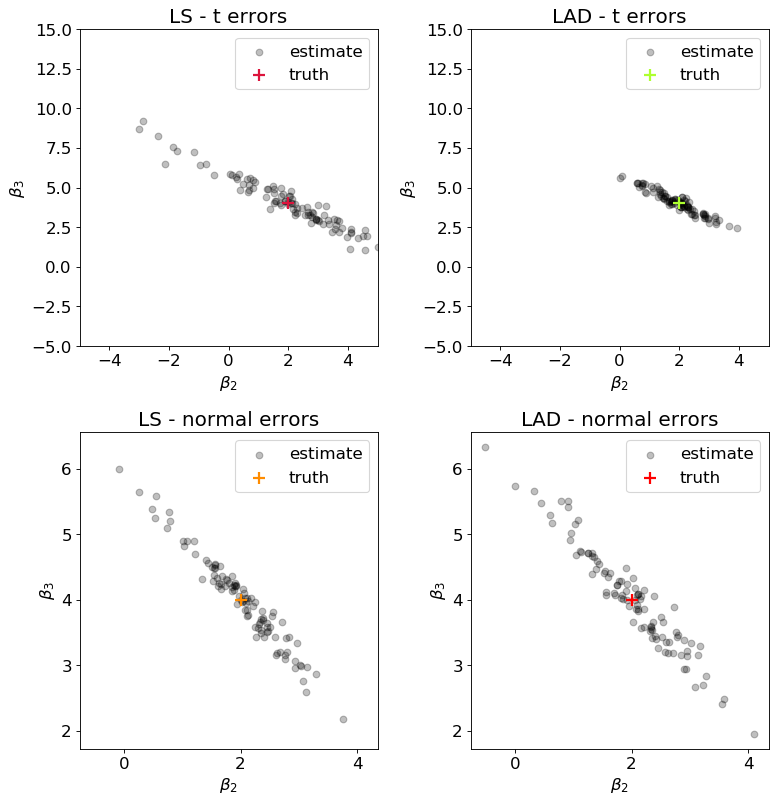

In [7]:
grid = plt.GridSpec(2, 2)
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams.update({'font.size': 15})

#LS - T-errors
ax0 = plt.subplot(grid[0, 0])
plt.ylim(-5,15)
plt.xlim(-8,8)
plt.scatter([ls_beta_t[:,1]], [ls_beta_t[:,2]], alpha=0.25,color='black',label='estimate')
plt.title("LS - t errors")
plt.tight_layout()
plt.scatter([beta[1]], [beta[2]],marker="+",facecolors='crimson', edgecolors='k',linewidth = 2,s=100,label='truth')
plt.xlabel(r"$\beta_2$")
plt.ylabel(r"$\beta_3$")
plt.legend()
plt.legend()

#LAD - T-errors
plt.ylim(-5,15)
plt.xlim(-5,5)
plt.subplot(grid[0, 1], sharex=ax0, sharey=ax0);
plt.scatter([lad_beta_t[:,1]], [lad_beta_t[:,2]], alpha=0.25,color='black',label='estimate')
plt.title("LAD - t errors")
plt.scatter([beta[1]], [beta[2]],marker="+",facecolors='greenyellow', edgecolors='k',linewidth = 2,s=100,label='truth')
plt.xlabel(r"$\beta_2$")
plt.ylabel(r"$\beta_3$")
plt.legend()

#LAD - Normal-errors
ax1 = plt.subplot(grid[1, 1]);
plt.scatter([lad_beta_n[:,1]], [lad_beta_n[:,2]], alpha=0.25,color='black',label='estimate')
plt.title("LAD - normal errors")
plt.tight_layout()
plt.scatter([beta[1]], [beta[2]],marker="+",facecolors='red', edgecolors='k',linewidth = 2,s=100,label='truth')
plt.xlabel(r"$\beta_2$")
plt.ylabel(r"$\beta_3$")
plt.legend()

#LS - Normal-errors
plt.subplot(grid[1, 0], sharex=ax1, sharey=ax1)
plt.scatter([ls_beta_n[:,1]], [ls_beta_n[:,2]], alpha=0.25,color='black',label='estimate')
plt.title("LS - normal errors")
plt.scatter([beta[1]], [beta[2]],marker="+",facecolors='darkorange', edgecolors='k',linewidth = 2,s=100,label='truth')
plt.xlabel(r"$\beta_2$")
plt.ylabel(r"$\beta_3$")
plt.legend()

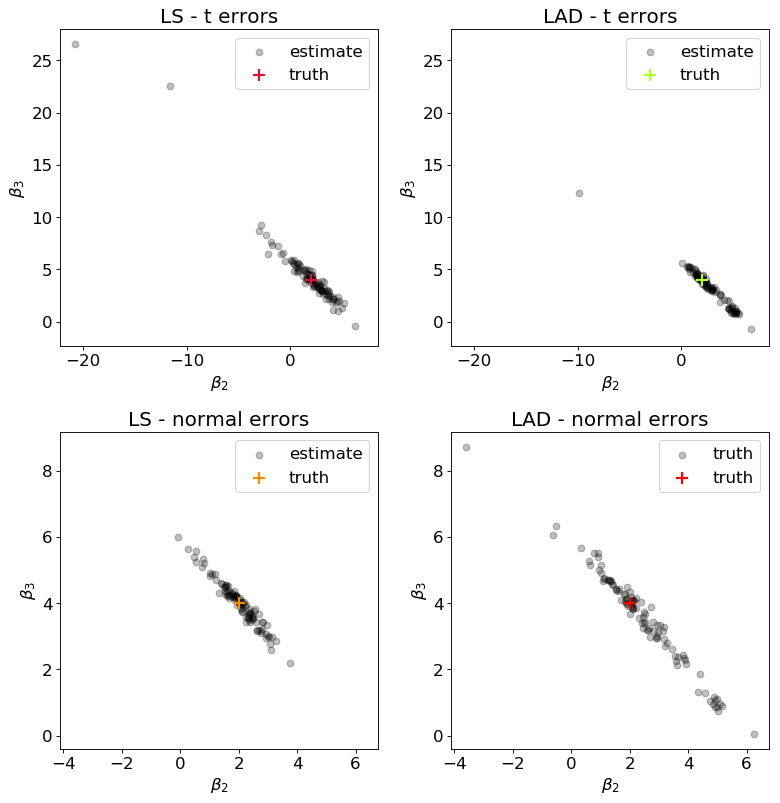

In [8]:
grid = plt.GridSpec(2, 2)
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams.update({'font.size': 15})


ax0 = plt.subplot(grid[0, 0])
plt.scatter([ls_beta_t_1[:,1]], [ls_beta_t_1[:,2]], alpha=0.25,color='black',label='estimate')
plt.title("LS - t errors")
plt.tight_layout()
plt.scatter([beta[1]], [beta[2]],marker="+",facecolors='crimson', edgecolors='k',linewidth = 2,s=100,label='truth')
plt.xlabel(r"$\beta_2$")
plt.ylabel(r"$\beta_3$")
plt.legend()


plt.subplot(grid[0, 1], sharex=ax0, sharey=ax0);
plt.scatter([lad_beta_t_1[:,1]], [lad_beta_t_1[:,2]], alpha=0.25,color='black',label='estimate')
plt.title("LAD - t errors")
plt.scatter([beta[1]], [beta[2]],marker="+",facecolors='greenyellow', edgecolors='k',linewidth = 2,s=100,label='truth')
plt.xlabel(r"$\beta_2$")
plt.ylabel(r"$\beta_3$")
plt.legend()

ax1 = plt.subplot(grid[1, 1]);
plt.scatter([lad_beta_n_1[:,1]], [lad_beta_n_1[:,2]], alpha=0.25,color='black',label='truth')
plt.title("LAD - normal errors")
plt.tight_layout()
plt.scatter([beta[1]], [beta[2]],marker="+",facecolors='red', edgecolors='k',linewidth = 2,s=100,label='truth')
plt.xlabel(r"$\beta_2$")
plt.ylabel(r"$\beta_3$")
plt.legend()

plt.subplot(grid[1, 0], sharex=ax1, sharey=ax1)
plt.scatter([ls_beta_n_1[:,1]], [ls_beta_n_1[:,2]], alpha=0.25,color='black',label='estimate')
plt.title("LS - normal errors")
plt.scatter([beta[1]], [beta[2]],marker="+",facecolors='darkorange', edgecolors='k',linewidth = 2,s=100,label='truth')
plt.xlabel(r"$\beta_2$")
plt.ylabel(r"$\beta_3$")
plt.legend()

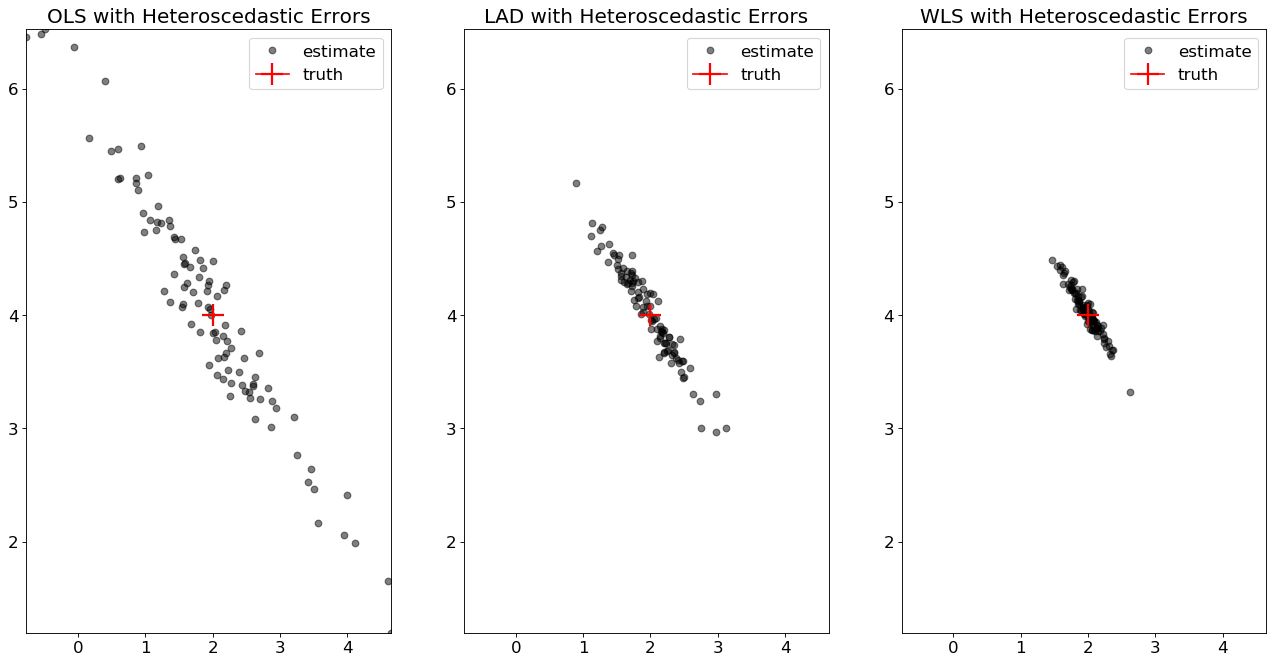

In [9]:

## get axis limits
xmax = max(np.max(ls_beta_h[:,1]),np.max(lad_beta_h[:,1]),np.max(wls_beta_h[:,1]))
xmin = min(np.min(ls_beta_h[:,1]),np.min(lad_beta_h[:,1]),np.min(wls_beta_h[:,1]))
ymax = max(np.max(ls_beta_h[:,2]),np.max(lad_beta_h[:,2]),np.max(wls_beta_h[:,2]))
ymin = min(np.min(ls_beta_h[:,2]),np.min(lad_beta_h[:,2]),np.min(wls_beta_h[:,2]))

## make plots
fig=plt.figure(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1, 3, 1)
plt.plot(ls_beta_h[:,1], ls_beta_h[:,2], 'o', alpha = 0.5, color='black',label='estimate')
plt.plot(beta[1],beta[2],marker="+",color='red',markeredgewidth=2,markersize=20,label='truth')
plt.title('OLS with Heteroscedastic Errors')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(lad_beta_h[:,1], lad_beta_h[:,2], 'o',alpha = 0.5, color='black',label='estimate')
plt.plot(beta[1],beta[2],marker="+",color='red',markeredgewidth=2,markersize=20,label='truth')
plt.title('LAD with Heteroscedastic Errors')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(wls_beta_h[:,1], wls_beta_h[:,2], 'o',alpha = 0.5, color='black',label='estimate')
plt.plot(beta[1],beta[2],marker="+",color='red',markeredgewidth=2,markersize=20,label='truth')
plt.title('WLS with Heteroscedastic Errors')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.legend()

## Question 2

Compare the speed of $\beta_{LS}$ to $\beta_{LAD}$ using a package such as microbenchmark in R or equivalent tools, such as %timeit, in Python, see [this section of the textbook](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html). Empirically determine the computational complexity (in $n$) of $\beta_{LAD}$ and $\beta_{LS}$ (we know from theoretical analysis that $\widehat{\beta}_{LS}$ should be linear in $n$). Provide a plot to summarize your findings.

In [11]:
%timeit -o model.fit(X, Yn)

428 µs ± 9.11 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


<TimeitResult : 428 µs ± 9.11 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)>

In [12]:
df1 = pd.DataFrame(np.column_stack((X,Yt,Yn)))
df1.columns = ['1', 'x','x2','yt','yn']
%timeit -o smf.quantreg('yt ~ 1+x+x2', df1).fit(q=.5,max_iter=3000)

C:\Users\jj reddy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


500 ms ± 127 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 500 ms ± 127 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [13]:
at = %timeit -o np.linalg.lstsq(X,Yt,rcond=None)[0]

45.8 µs ± 816 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [14]:
an = %timeit -o np.linalg.lstsq(X,Yn,rcond=None)[0]

46.2 µs ± 2.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [15]:
ct = %timeit -o scipy.optimize.minimize(LADT,x0,method='Nelder-Mead', tol=1e-6).x

15.8 ms ± 1.35 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
cn = %timeit -o scipy.optimize.minimize(LADN,x0,method='Nelder-Mead', tol=1e-6).x

27.8 ms ± 1.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
dt = %timeit -o smf.quantreg('Yt ~ 1+x+x2', df).fit(q=.5,max_iter=100000).params

494 ms ± 77.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
dn = %timeit -o smf.quantreg('Yn ~ 1+x+x2', df).fit(q=.5,max_iter=100000).params

19.3 ms ± 1.86 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [19]:
ns = 10000*np.power(2,np.arange(6))
ns

array([ 10000,  20000,  40000,  80000, 160000, 320000], dtype=int32)

In [20]:
X = {}
Y = {}
for ii in ns:
    x = np.linspace(start=0.0,stop=1.0,num=ii)
    X[ii] = np.column_stack((np.ones(ii),x,np.power(x,2)))
    Y[ii] = np.matmul(X[ii],beta)[:,0]

In [21]:
def LAD(betah,Xh,yh):
    return(np.sum(np.abs(yh - np.matmul(Xh,betah.reshape((3,1)))[:,0])))

def run_l1(ii):
    scipy.optimize.minimize(LAD,x0,args=(X[ii],Y[ii]),method='Nelder-Mead', tol=1e-6).x

tms = []
for ii in ns:
    print(ii)
    a = %timeit -o run_l1(ii)
    tms.append(a.best)

10000
90.2 ms ± 4.93 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
20000
122 ms ± 7.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
40000
170 ms ± 10.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
80000
289 ms ± 34.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
160000
1.53 s ± 4.91 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
320000
3.36 s ± 123 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
# Compute times for LS vs n
for k in np.arange(1,8):
    n = np.power(10,k)
    x = np.linspace(0,1,num=n) #Safer than np.arange for floating point
    x = x[:,np.newaxis]
    X = np.column_stack((np.ones(n),x,x**2))
    yn = np.dot(X,beta) + np.random.normal(size=(n,1))
    print('n = 10e',k)
    %timeit -n100 model.fit(X, yn)

n = 10e 1
480 µs ± 308 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
n = 10e 2
397 µs ± 32.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
n = 10e 3
458 µs ± 33.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
n = 10e 4
1e+03 µs ± 62.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
n = 10e 5
10.3 ms ± 731 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
n = 10e 6
117 ms ± 2.55 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
n = 10e 7
1.16 s ± 95 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [23]:
# Compute times for LAD vs n
for k in np.arange(1,8):
    n = np.power(10,k)
    x = np.linspace(0,1,num=n) 
    x = x[:,np.newaxis]
    X = np.column_stack((np.ones(n),x,x**2))
    yad = np.dot(X,beta) + np.random.normal(size=(n,1))
    df2 = pd.DataFrame(np.column_stack((X,yad)))
    df2.columns = ['1', 'x','x2','yn']
    print('n = 10e',k)
    if 1 <= k < 3:
        %timeit -n250 smf.quantreg('yn ~ x+x2', df2).fit(q=.5,max_iter=3000)
    elif 3 <= k < 5:
        %timeit -n150 smf.quantreg('yn ~ x+x2', df2).fit(q=.5,max_iter=3000)
    else:
        %timeit -n5 smf.quantreg('yn ~ x+x2', df2).fit(q=.5,max_iter=3000)

n = 10e 1


C:\Users\jj reddy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


8.8 ms ± 727 µs per loop (mean ± std. dev. of 7 runs, 250 loops each)
n = 10e 2
17.5 ms ± 1.33 ms per loop (mean ± std. dev. of 7 runs, 250 loops each)
n = 10e 3
36.2 ms ± 3.89 ms per loop (mean ± std. dev. of 7 runs, 150 loops each)
n = 10e 4
146 ms ± 11.2 ms per loop (mean ± std. dev. of 7 runs, 150 loops each)
n = 10e 5
396 ms ± 44.1 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)
n = 10e 6
11.5 s ± 386 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)
n = 10e 7
1min 19s ± 5.62 s per loop (mean ± std. dev. of 7 runs, 5 loops each)


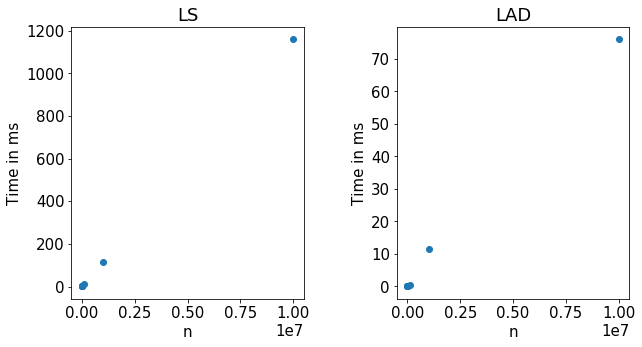

In [37]:
# Plot times
def myLabel(plt,title):
    plt.title(title)
    plt.xlabel('n')
    plt.ylabel('Time in ms')
    
grid = plt.GridSpec(1, 2, wspace=0.4, hspace=0.3)
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 15})

k = np.arange(1,8)
t = np.power(10,k)
t = t[np.newaxis,:]
yLAD = np.array([0.0088,0.0175,0.0362,0.146,0.396,11.5,76])
yLAD = yLAD[np.newaxis,:]

plt.subplot(grid[0, 1])
plt.scatter(t,yLAD)
plt.plot(t,yLAD)
myLabel(plt,'LAD')

k = np.arange(1,8)
t = np.power(10,k)
t = t[np.newaxis,:]
yLS = np.array([0.480,0.397,0.458,1,10.3,117,1160])
yLS = yLS[np.newaxis,:]

plt.subplot(grid[0, 0])
plt.scatter(t,yLS)
plt.plot(t,yLS)
myLabel(plt,'LS')

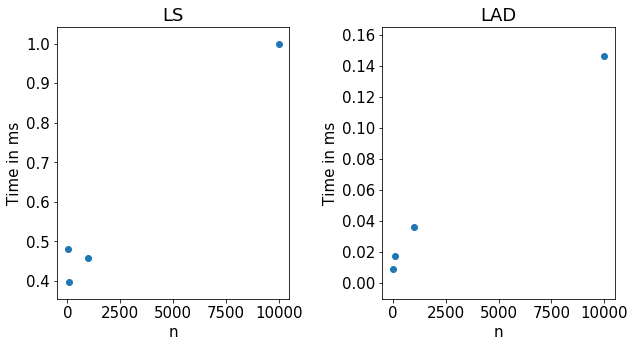

In [40]:
# Plot times
def myLabel(plt,title):
    plt.title(title)
    plt.xlabel('n')
    plt.ylabel('Time in ms')
    
grid = plt.GridSpec(1, 2, wspace=0.4, hspace=0.3)
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 15})

k = np.arange(1,5)
t = np.power(10,k)
t = t[np.newaxis,:]
yLAD = np.array([0.0088,0.0175,0.0362,0.146])
yLAD = yLAD[np.newaxis,:]

plt.subplot(grid[0, 1])
plt.scatter(t,yLAD)
plt.plot(t,yLAD)
myLabel(plt,'LAD')

k = np.arange(1,5)
t = np.power(10,k)
t = t[np.newaxis,:]
yLS = np.array([0.480,0.397,0.458,1])
yLS = yLS[np.newaxis,:]

plt.subplot(grid[0, 0])
plt.scatter(t,yLS)
plt.plot(t,yLS)
myLabel(plt,'LS')

In [35]:
# Show times in a table
timeData = pd.DataFrame(np.column_stack((t.T,yLS.T)),columns = ['t','LS'])
timeData.index += 1

yLAD = np.column_stack((yLAD,0))
timeDataLAD = pd.DataFrame(yLAD.T,columns = ['LAD'])
timeDataLAD.index += 1

timeData = pd.concat([timeData, timeDataLAD],axis=1)
from IPython.display import display
display(timeData)

,t,LS,LAD
1,10.0,0.480,0.0088
2,100.0,0.397,0.0175
3,1000.0,0.458,0.0362
4,10000.0,1.000,0.1460
5,100000.0,10.300,0.3960
6,1000000.0,117.000,11.5000
7,10000000.0,1160.000,76.0000
8,NaN,NaN,0.0000
